# Assignment 14 (Random Forest)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [2]:
df = pd.read_csv("glass.csv")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## EDA

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0


In [4]:
df.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type    float64
dtype: object

In [6]:
df.shape

(999, 10)

In [7]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [8]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
994     True
995     True
996     True
997     True
998     True
Length: 999, dtype: bool

In [9]:
df.isnull().sum()

RI      785
Na      785
Mg      785
Al      785
Si      785
K       785
Ca      785
Ba      785
Fe      785
Type    785
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    float64
dtypes: float64(10)
memory usage: 78.2 KB


In [11]:
# Check Missing Value
print("Missing Values per Column:")
print(df.isnull().sum())

Missing Values per Column:
RI      785
Na      785
Mg      785
Al      785
Si      785
K       785
Ca      785
Ba      785
Fe      785
Type    785
dtype: int64


In [12]:
# Percentage of missing
print("\nPercentage Missing:")
print((df.isnull().mean() * 100).round(2))


Percentage Missing:
RI      78.58
Na      78.58
Mg      78.58
Al      78.58
Si      78.58
K       78.58
Ca      78.58
Ba      78.58
Fe      78.58
Type    78.58
dtype: float64


In [13]:
# Check Outliers (numeric)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

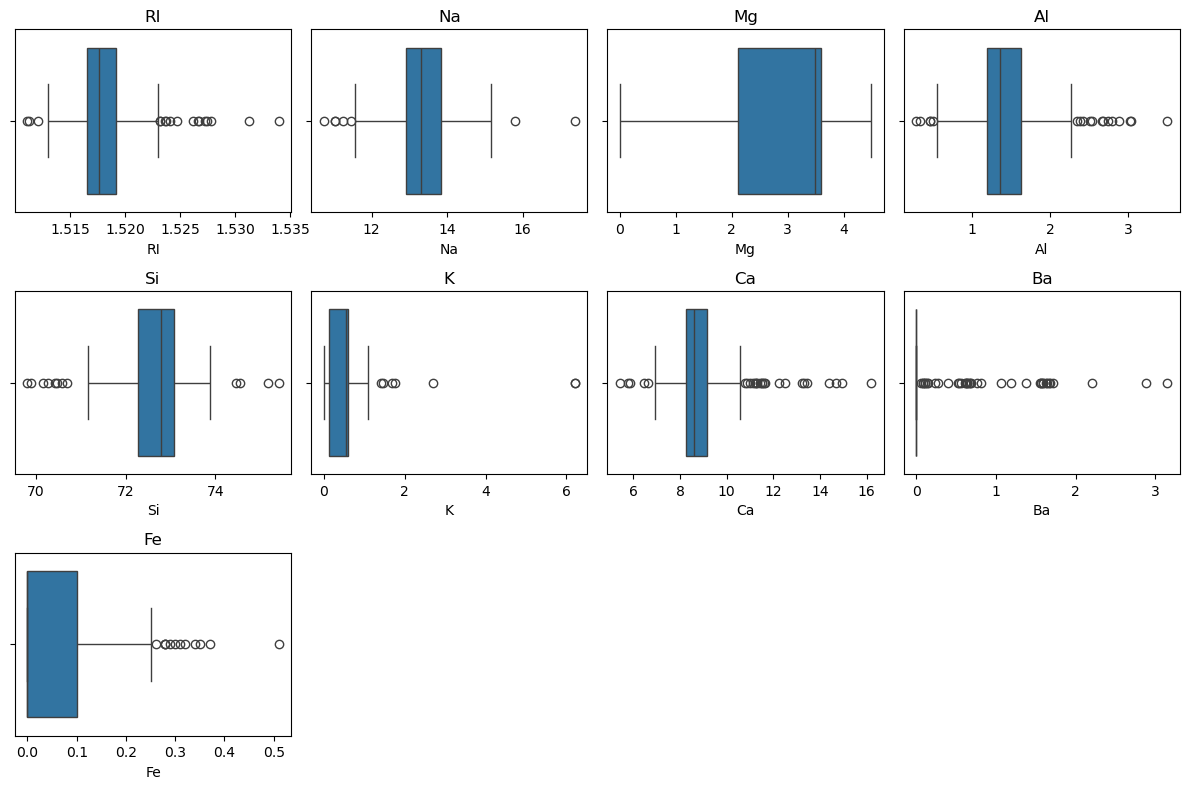

In [14]:
numerical_cols = df.columns[:-1]                                  
plt.figure(figsize=(12,8))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 4, i+1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [15]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"### Basic Statistics ###")
print(df.describe())

### Basic Statistics ###
### Basic Statistics ###
### Basic Statistics ###
### Basic Statistics ###
### Basic Statistics ###
### Basic Statistics ###
### Basic Statistics ###
### Basic Statistics ###
### Basic Statistics ###
               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe    

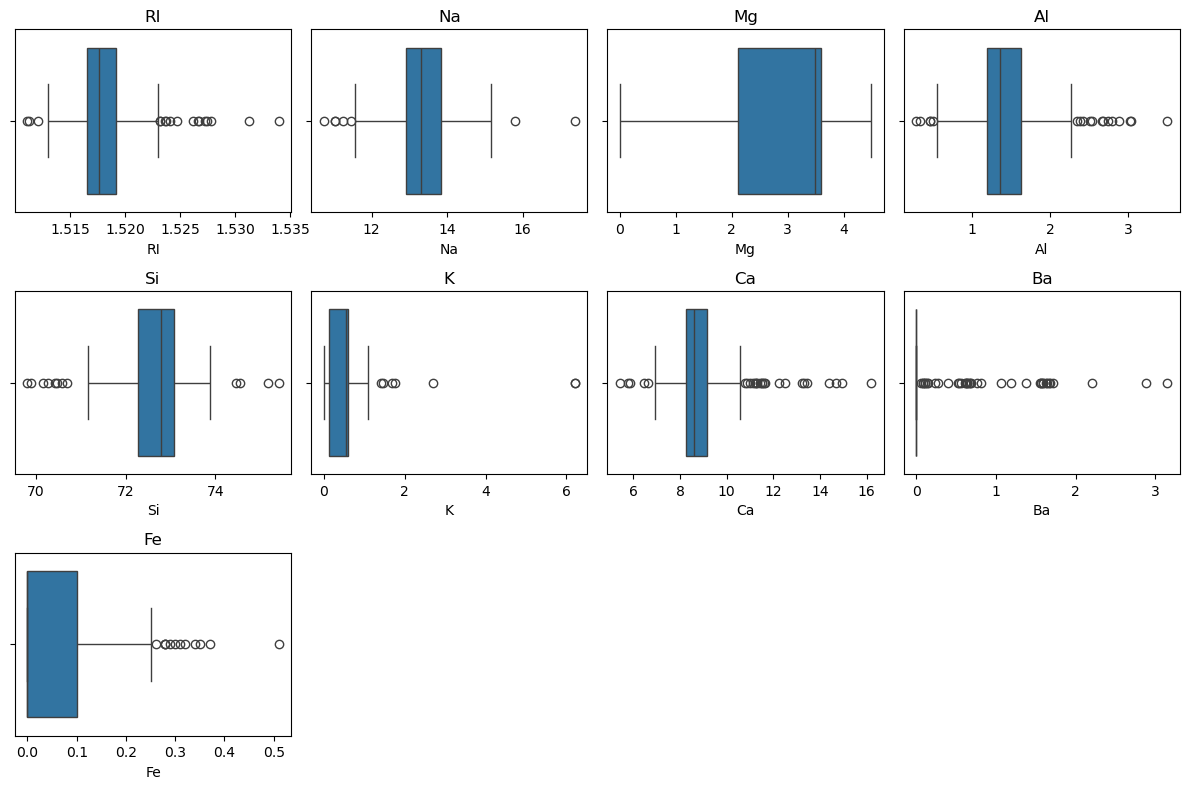

In [16]:
# Check for Outliers using Boxplots
numerical_cols = df.columns[:-1]  # Assuming last column is 'Type'
plt.figure(figsize=(12,8))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 4, i+1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [17]:
# Outlier Detection using IQR Method
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\nOutliers in {col}: {len(outliers)}")


Outliers in RI: 17

Outliers in Na: 7

Outliers in Mg: 0

Outliers in Al: 18

Outliers in Si: 12

Outliers in K: 7

Outliers in Ca: 26

Outliers in Ba: 38

Outliers in Fe: 12


In [18]:
# Check for Inconsistencies (e.g., negative values where not expected)
for col in numerical_cols:
    if df[col].min() < 0:
        print(f"\n{col} has negative values: {df[col].min()}")

## Data Visualization

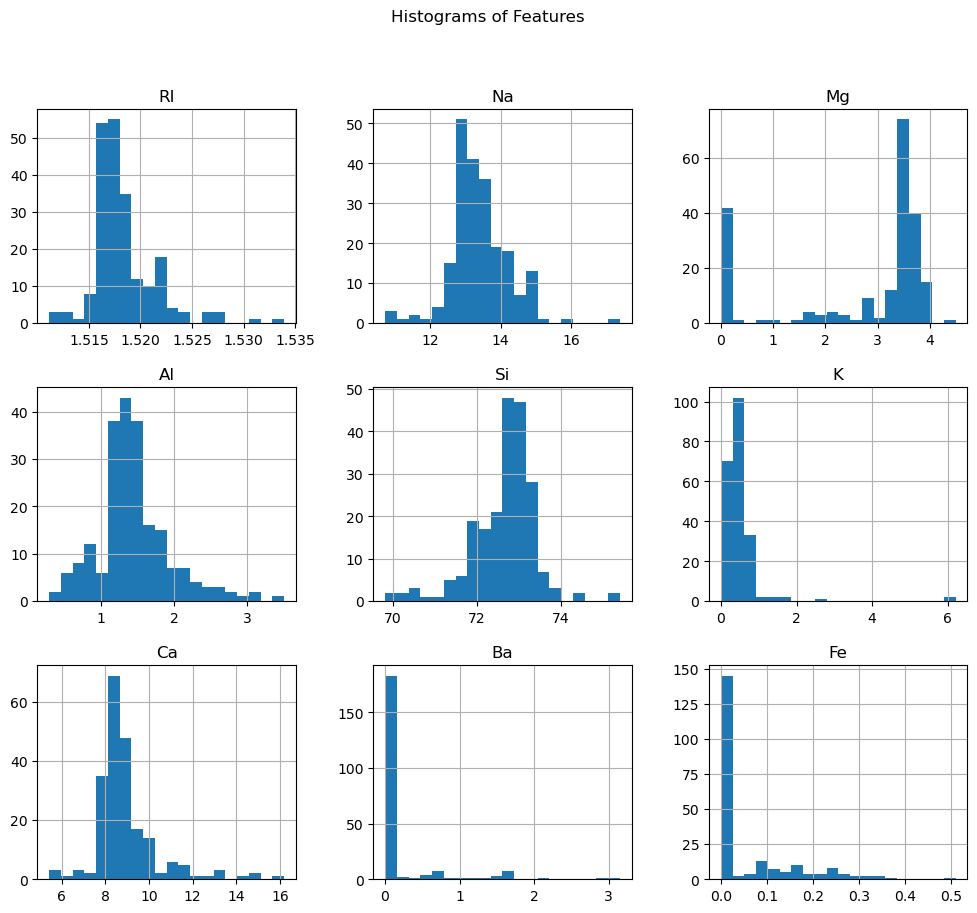

In [19]:
# Histograms for Each Feature
df.drop('Type', axis=1).hist(figsize=(12,10), bins=20)
plt.suptitle("Histograms of Features")
plt.show()


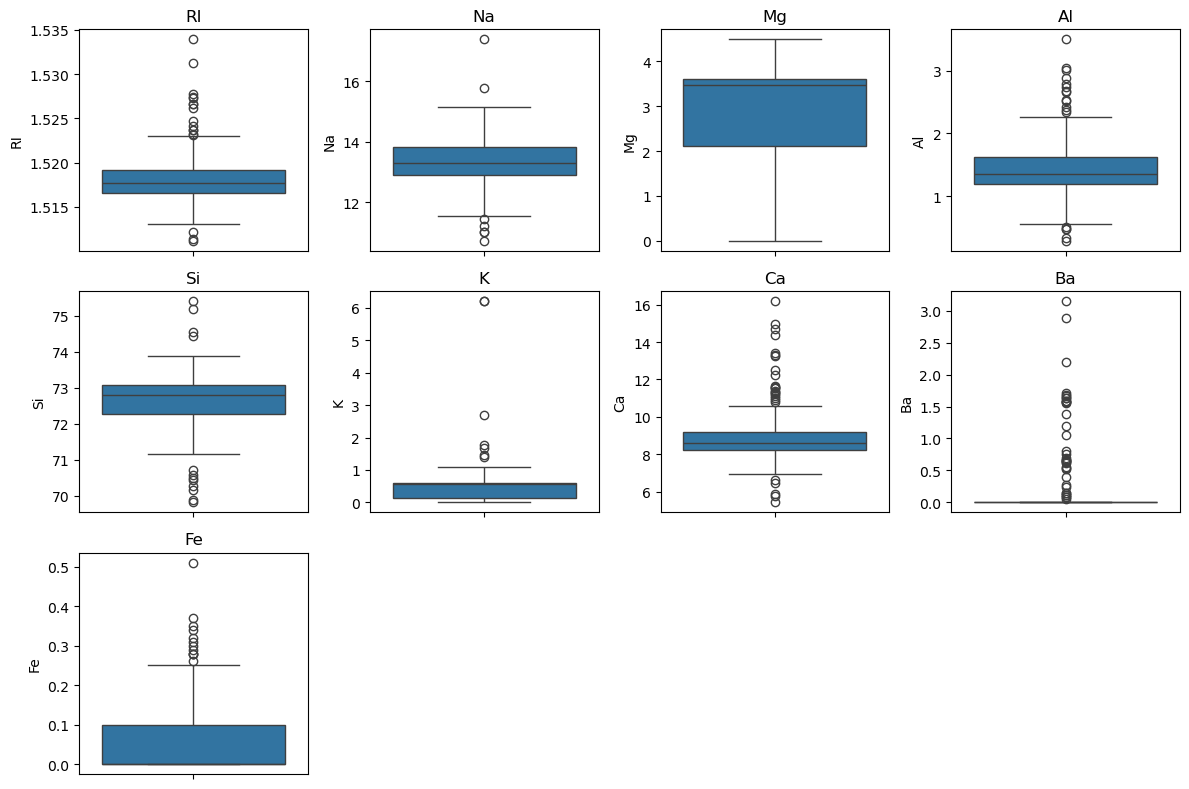

In [20]:
# Boxplots for Each Feature
numerical_cols = df.columns[:-1]  # All except 'Type'
plt.figure(figsize=(12,8))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


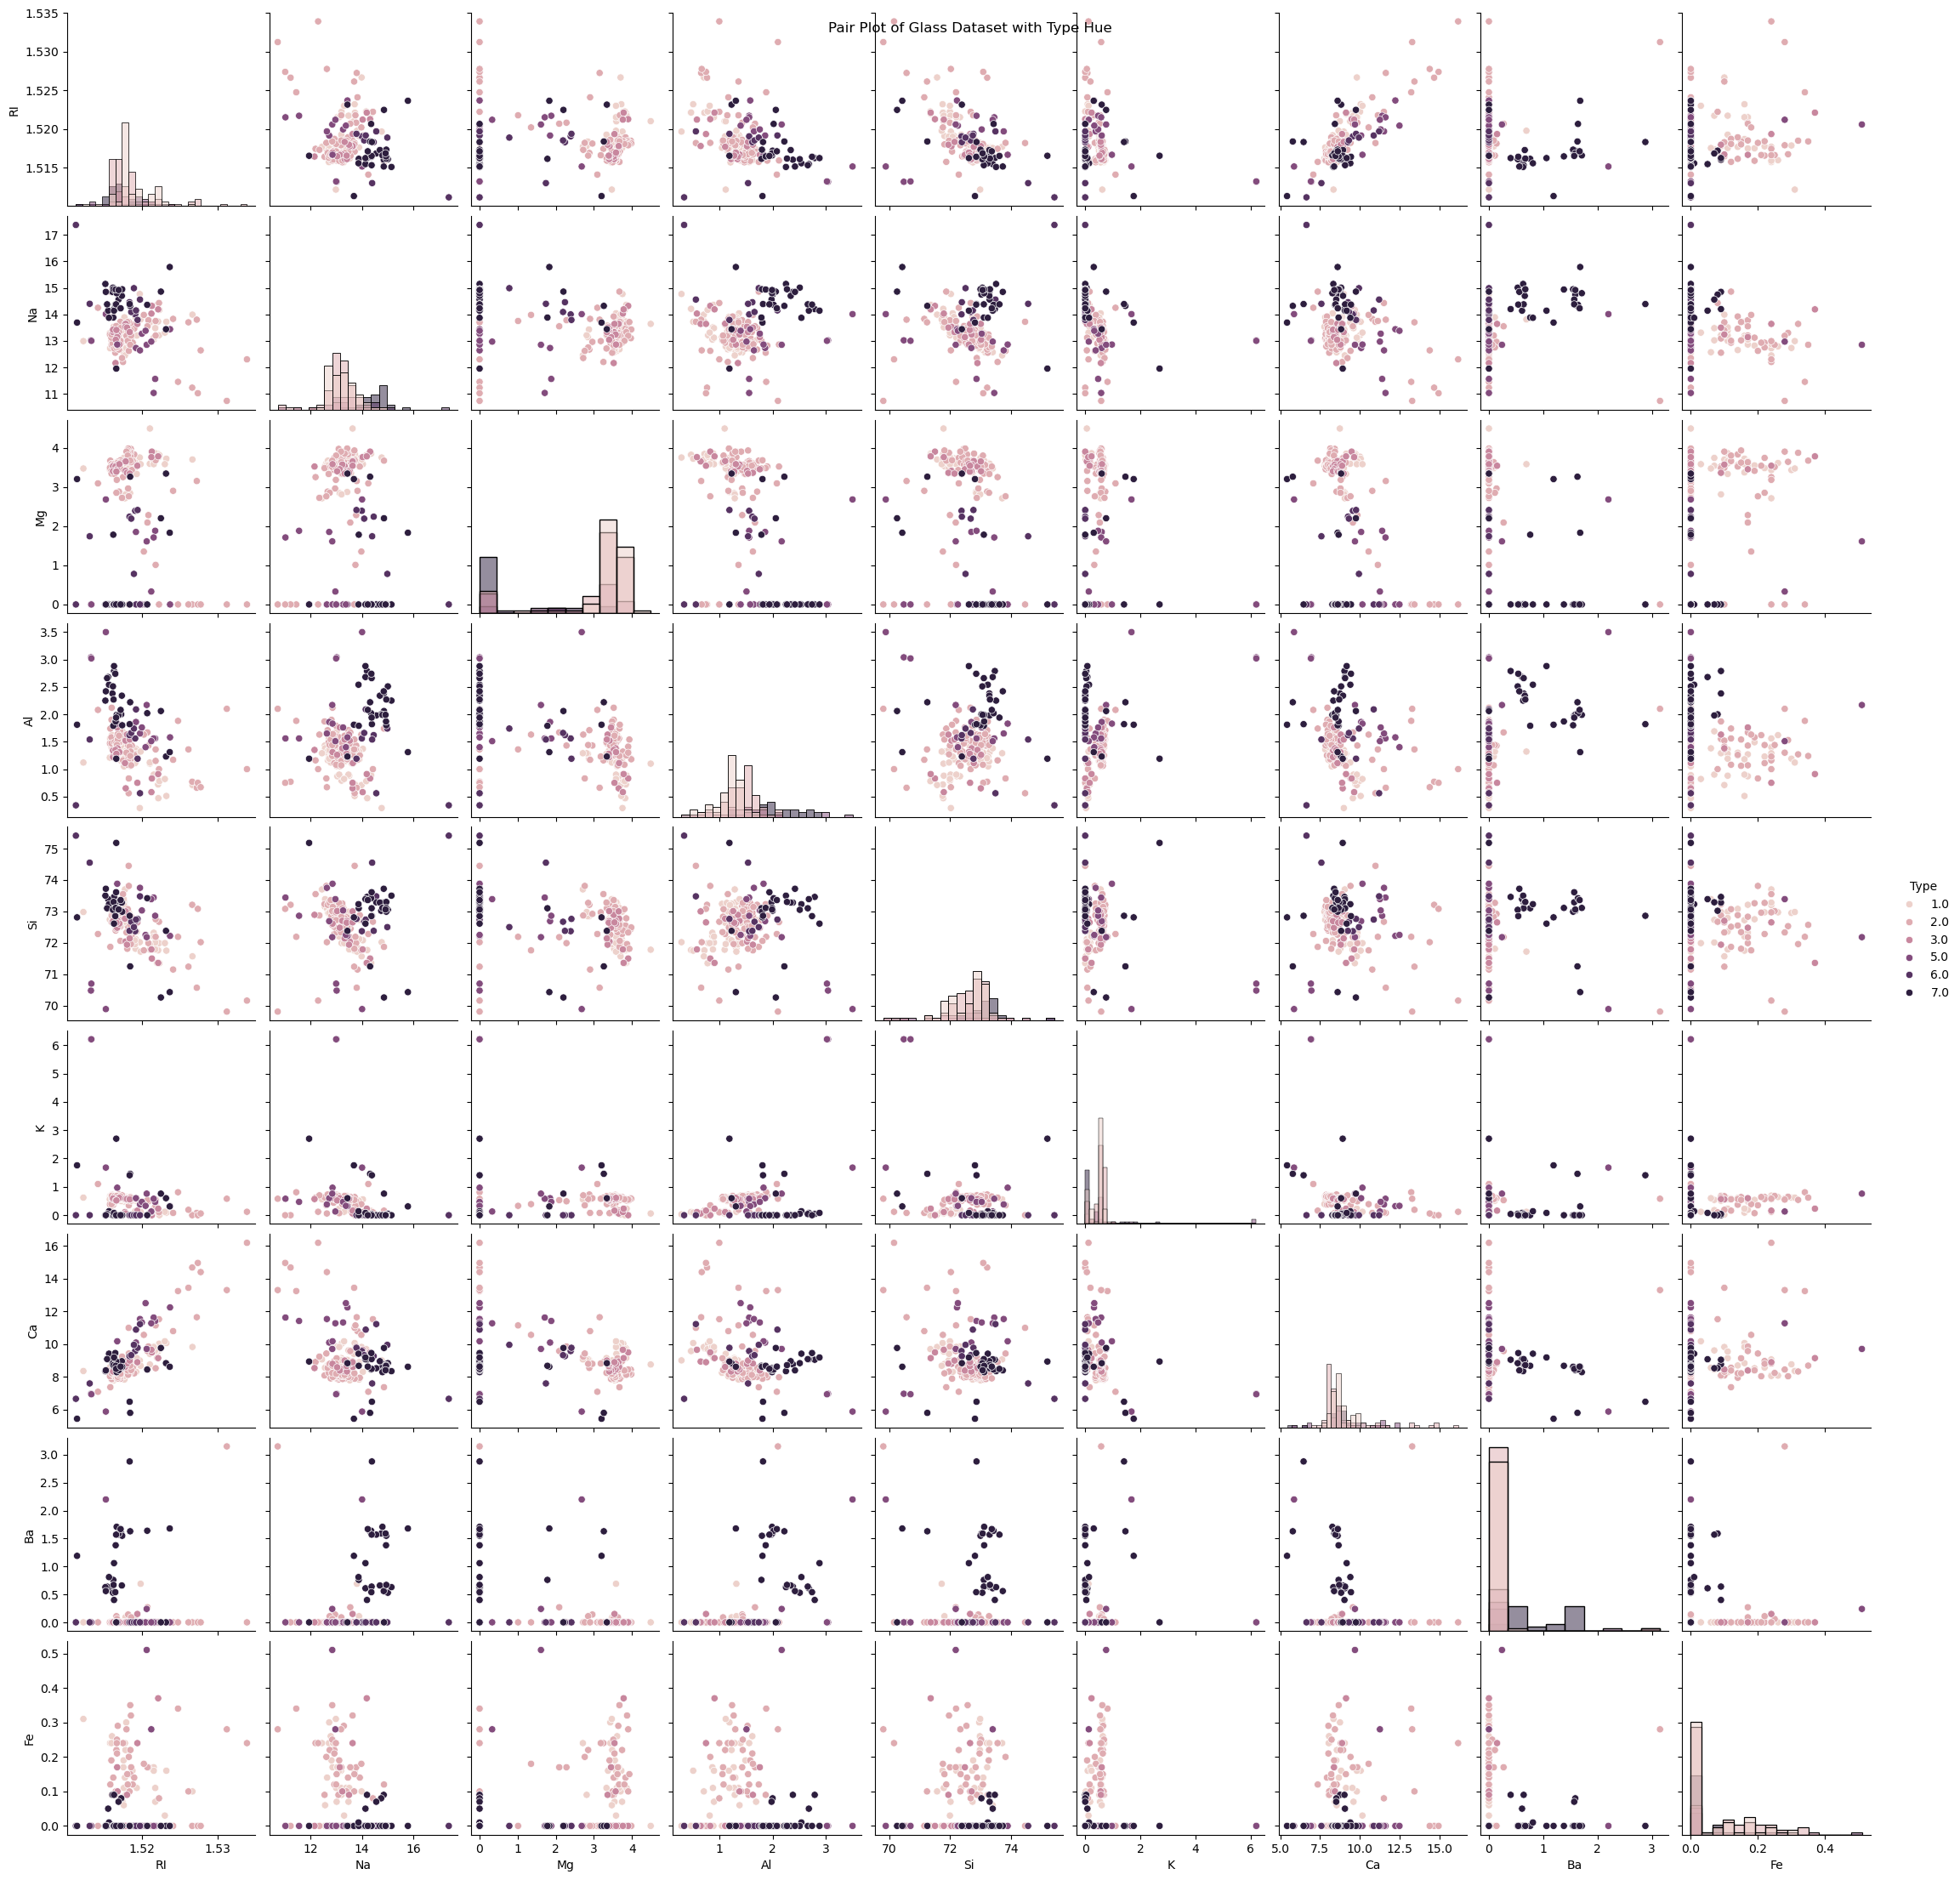

In [21]:
# Pair Plot with Hue for Target ('Type')
sns.pairplot(df, hue='Type', diag_kind='hist')
plt.suptitle("Pair Plot of Glass Dataset with Type Hue")
plt.show()

Observations:

1. Correlations:
    - Some chemical components might show correlations (e.g., certain elements together).
    - Check heatmap for pairwise feature correlations.

2. Type Differentiation:
    - Pair plot shows how Type separates in feature spaces.
    - Boxplots indicate feature distributions across glass Type.

3. Patterns:
    - Certain oxides (Ca, Na, etc.) might show patterns linked to glass type.



## Data Preprocessing

In [22]:
# Check Missing Values
missing_values = df.isnull().sum
print(missing_values)


<bound method DataFrame.sum of         RI     Na     Mg     Al     Si      K     Ca     Ba     Fe   Type
0    False  False  False  False  False  False  False  False  False  False
1    False  False  False  False  False  False  False  False  False  False
2    False  False  False  False  False  False  False  False  False  False
3    False  False  False  False  False  False  False  False  False  False
4    False  False  False  False  False  False  False  False  False  False
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...
994   True   True   True   True   True   True   True   True   True   True
995   True   True   True   True   True   True   True   True   True   True
996   True   True   True   True   True   True   True   True   True   True
997   True   True   True   True   True   True   True   True   True   True
998   True   True   True   True   True   True   True   True   True   True

[999 rows x 10 columns]>


In [23]:
total_missing = df.isnull().sum().sum()
print(f"### Missing Values per Column ###")
print(missing_values)

### Missing Values per Column ###
<bound method DataFrame.sum of         RI     Na     Mg     Al     Si      K     Ca     Ba     Fe   Type
0    False  False  False  False  False  False  False  False  False  False
1    False  False  False  False  False  False  False  False  False  False
2    False  False  False  False  False  False  False  False  False  False
3    False  False  False  False  False  False  False  False  False  False
4    False  False  False  False  False  False  False  False  False  False
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...
994   True   True   True   True   True   True   True   True   True   True
995   True   True   True   True   True   True   True   True   True   True
996   True   True   True   True   True   True   True   True   True   True
997   True   True   True   True   True   True   True   True   True   True
998   True   True   True   True   True   True   True   True   True   True

[999 rows x 10 columns]>


In [24]:
# Check Total Missing Values
total_missing = df.isnull().sum().sum()
print(f"\nTotal Missing Values: {total_missing}")


Total Missing Values: 7850


In [25]:
if total_missing == 0:
    print("## Strategy Decision ##")
if total_missing == 0:
    print("\nNo missing values. No need for imputation.")
else:
    print("\nStrategies for handling missing values:")
    print("1. Drop rows with missing values: df.dropna()")
    print("2. Impute with mean/median/mode: df.fillna(df.mean())")
    print("3. Use model-based imputation (e.g., KNNImputer)")


Strategies for handling missing values:
1. Drop rows with missing values: df.dropna()
2. Impute with mean/median/mode: df.fillna(df.mean())
3. Use model-based imputation (e.g., KNNImputer)


In [26]:
# Simulate missing values for demonstration (introducing NA in a few cells)
np.random.seed(42)
simulated_df = df.copy()
idx = np.random.choice(simulated_df.index, size=10, replace=False)
col = np.random.choice(simulated_df.columns[:-1], size=10, replace=True)  # numeric cols likely
for i, c in zip(idx, col):
    simulated_df.loc[i, c] = np.nan

print("\nSimulated Missing Values:")
print(simulated_df.isnull().sum())



Simulated Missing Values:
RI      785
Na      786
Mg      785
Al      785
Si      785
K       785
Ca      785
Ba      785
Fe      785
Type    785
dtype: int64


In [27]:
# Imputation Strategy: Median Imputation for Numeric Columns
numeric_cols = simulated_df.columns[:-1]  # Assuming all but 'Type' are numeric
simulated_df[numeric_cols] = simulated_df[numeric_cols].fillna(simulated_df[numeric_cols].median())

print("\nAfter Median Imputation:")
print(simulated_df.isnull().sum())


After Median Imputation:
RI        0
Na        0
Mg        0
Al        0
Si        0
K         0
Ca        0
Ba        0
Fe        0
Type    785
dtype: int64


Reasoning:

1. Median Imputation: Robust for numeric data, less sensitive to outliers compared to mean.

2. Context: Glass composition attributes are continuous; median is reasonable.

3. Alternative: Could use KNN imputer (from sklearn.impute import KNNImputer) for multivariate approach.


In [28]:
categorical_cols = ['Type']                                              
print(f"### Data Types ###")
print(df.dtypes)

### Data Types ###
RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type    float64
dtype: object


In [29]:
# Identify Categorical Columns
# Typically 'Type' is categorical (target variable)
categorical_cols = ['Type']  # Based on common structure of glass dataset
print(f"\nCategorical Columns Identified: {categorical_cols}")


Categorical Columns Identified: ['Type']


In [30]:
# One-Hot Encoding for 'Type'
df_encoded = pd.get_dummies(df, columns=['Type'], prefix='Type')
print("\nDataFrame after One-Hot Encoding:")
print(df_encoded.head())


DataFrame after One-Hot Encoding:
        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type_1.0  \
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0      True   
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0      True   
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0      True   
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0      True   
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0      True   

   Type_2.0  Type_3.0  Type_5.0  Type_6.0  Type_7.0  
0     False     False     False     False     False  
1     False     False     False     False     False  
2     False     False     False     False     False  
3     False     False     False     False     False  
4     False     False     False     False     False  


In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
le = LabelEncoder()
df['Type_encoded'] = le.fit_transform(df['Type'])
print("\nType with Label Encoding:")
print(df[['Type', 'Type_encoded']].head())


Type with Label Encoding:
   Type  Type_encoded
0   1.0             0
1   1.0             0
2   1.0             0
3   1.0             0
4   1.0             0


In [33]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [34]:
# Separate features (X) and target (y)
X = df.drop('Type', axis=1)
y = df['Type']

In [35]:
# Standardization (using StandardScaler)
scaler_std = StandardScaler()
X_std = scaler_std.fit_transform(X)
print("Standardized Features (first few rows):")
print(X_std[:3])


Standardized Features (first few rows):
[[ 0.87286765  0.28495326  1.25463857 -0.69244192 -1.12708201 -0.67170546
  -0.14576634 -0.35287683 -0.5864509  -2.53301194]
 [-0.24933347  0.59181718  0.63616803 -0.17046023  0.10231907 -0.02621325
  -0.79373376 -0.35287683 -0.5864509  -2.53301194]
 [-0.72131806  0.14993314  0.60142249  0.19091171  0.43878673 -0.16453301
  -0.82894938 -0.35287683 -0.5864509  -2.53301194]]


In [36]:
# Normalization (using MinMaxScaler)
scaler_minmax = MinMaxScaler()
X_norm = scaler_minmax.fit_transform(X)
print("\nNormalized Features (first few rows):")
print(X_norm[:3])


Normalized Features (first few rows):
[[0.43283582 0.43759398 1.         0.25233645 0.35178571 0.00966184
  0.30855019 0.         0.         0.        ]
 [0.28358209 0.47518797 0.80178174 0.33333333 0.52142857 0.07729469
  0.22304833 0.         0.         0.        ]
 [0.22080773 0.42105263 0.79064588 0.3894081  0.56785714 0.06280193
  0.21840149 0.         0.         0.        ]]


In [37]:
# Convert back to DataFrames for readability
X_std_df = pd.DataFrame(X_std, columns=X.columns)
X_std_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_encoded
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451,-2.533012
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451,-2.533012
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451,-2.533012
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451,-2.533012
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451,-2.533012
...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.479463
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.479463
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.479463
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.479463


In [38]:
X_norm_df = pd.DataFrame(X_norm, columns=X.columns)
X_norm_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_encoded
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.0,0.0,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.0,0.0,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.0,0.0,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.0,0.0,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [39]:
print("\nStandardized DataFrame:")
print(X_std_df.describe().round(2))  # mean ~0, std ~1



Standardized DataFrame:
           RI      Na      Mg      Al      Si       K      Ca      Ba      Fe  \
count  214.00  214.00  214.00  214.00  214.00  214.00  214.00  214.00  214.00   
mean    -0.00    0.00   -0.00    0.00    0.00   -0.00   -0.00   -0.00    0.00   
std      1.00    1.00    1.00    1.00    1.00    1.00    1.00    1.00    1.00   
min     -2.38   -3.29   -1.87   -2.32   -3.68   -0.76   -2.48   -0.35   -0.59   
25%     -0.61   -0.61   -0.40   -0.51   -0.48   -0.58   -0.50   -0.35   -0.59   
50%     -0.23   -0.13    0.55   -0.17    0.18    0.09   -0.25   -0.35   -0.59   
75%      0.26    0.51    0.64    0.37    0.56    0.17    0.15   -0.35    0.44   
max      5.14    4.88    1.25    4.13    3.57    8.78    5.09    6.00    4.66   

       Type_encoded  
count        999.00  
mean           0.00  
std            1.00  
min           -2.53  
25%            0.48  
50%            0.48  
75%            0.48  
max            0.48  


In [40]:
print("\nNormalized DataFrame:")
print(X_norm_df.describe().round(2))  # values typically between 0-1


Normalized DataFrame:
           RI      Na      Mg      Al      Si       K      Ca      Ba      Fe  \
count  214.00  214.00  214.00  214.00  214.00  214.00  214.00  214.00  214.00   
mean     0.32    0.40    0.60    0.36    0.51    0.08    0.33    0.06    0.11   
std      0.13    0.12    0.32    0.16    0.14    0.11    0.13    0.16    0.19   
min      0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00   
25%      0.24    0.33    0.47    0.28    0.44    0.02    0.26    0.00    0.00   
50%      0.29    0.39    0.78    0.33    0.53    0.09    0.29    0.00    0.00   
75%      0.35    0.47    0.80    0.42    0.59    0.10    0.35    0.00    0.20   
max      1.00    1.00    1.00    1.00    1.00    1.00    1.00    1.00    1.00   

       Type_encoded  
count        999.00  
mean           0.84  
std            0.33  
min            0.00  
25%            1.00  
50%            1.00  
75%            1.00  
max            1.00  


In [41]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for easier viewing
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("After Standardization:")
X_scaled_df.head()

After Standardization:


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_encoded
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451,-2.533012
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451,-2.533012
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451,-2.533012
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451,-2.533012
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451,-2.533012


In [42]:
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)

print("After Normalization:")
X_normalized_df.head()

After Normalization:


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_encoded
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.0,0.0,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.0,0.0,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.0,0.0,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.0,0.0,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.0,0.0,0.0


In [43]:
# Check class distribution
print("### Class Distribution ###")
print(df['Type'].value_counts())

### Class Distribution ###
Type
2.0    76
1.0    70
7.0    29
3.0    17
5.0    13
6.0     9
Name: count, dtype: int64


In [44]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


In [45]:
X = df.drop('Type', axis=1)
y = df['Type']


In [46]:
# Assuming df is your DataFrame and 'Type' is target y
df = df.dropna(subset=['Type'])
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,Type_encoded
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1.0,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1.0,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1.0,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1.0,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7.0,5
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7.0,5
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7.0,5
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7.0,5


In [47]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

In [54]:
smote = SMOTE(random_state=42)
smote

SMOTE(random_state=42)

In [55]:
under_sampler = RandomUnderSampler(random_state=42)
under_sampler

RandomUnderSampler(random_state=42)

In [57]:
# Drop rows where target 'Type' is NaN
df = df.dropna(subset=['Type'])
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,Type_encoded
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1.0,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1.0,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1.0,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1.0,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7.0,5
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7.0,5
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7.0,5
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7.0,5


In [58]:
# Separate features (X) and target (y)
X = df.drop('Type', axis=1)
y = df['Type']


In [59]:
# Check for NaN in features (X)
print("### NaN in Features ###")
print(X.isnull().sum())

### NaN in Features ###
RI              0
Na              0
Mg              0
Al              0
Si              0
K               0
Ca              0
Ba              0
Fe              0
Type_encoded    0
dtype: int64


In [89]:
X_resampled, y_resampled = under_sampler.fit_resample(X, y)

In [90]:
print("After Undersampling:", pd.Series(y_resampled).value_counts())

After Undersampling: Type
1.0    9
2.0    9
3.0    9
5.0    9
6.0    9
7.0    9
Name: count, dtype: int64


In [91]:
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X, y)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', random_state=42)

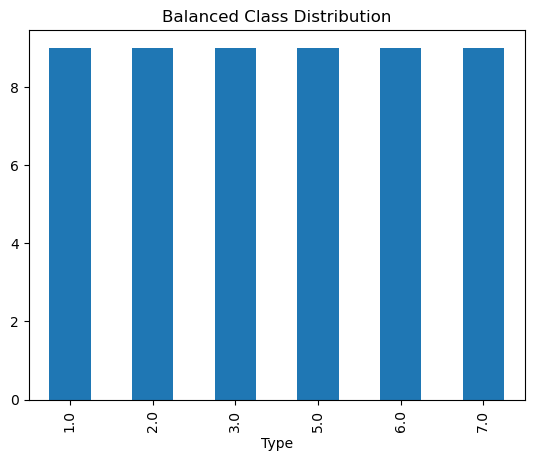

In [92]:
import matplotlib.pyplot as plt
pd.Series(y_resampled).value_counts().plot(kind='bar', title='Balanced Class Distribution')
plt.show()

## Random Forest Model Implementation

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [65]:
# 80% training data, 20% testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (171, 10)
Testing set shape: (43, 10)


In [66]:
# Initialize Random Forest Classifier
rf = RandomForestClassifier(
    n_estimators=100,      # Number of trees
    random_state=42,       # Reproducibility
    max_depth=None,        # Let the trees expand fully
    min_samples_split=2,   # Default split
    min_samples_leaf=1     # Default leaf
)

# Fit the model
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [67]:
# Initialize the model
rf_model = RandomForestClassifier(
    n_estimators=100,      # Number of trees
    random_state=42        # For reproducibility
)

# Train (fit) the model on training data
rf_model.fit(X_train, y_train)

print("✅ Model trained successfully!")

✅ Model trained successfully!


In [68]:
train_accuracy = rf_model.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy:.2f}")

Training Accuracy: 1.00


In [69]:
y_pred = rf.predict(X_test)
y_pred

array([7., 5., 2., 5., 1., 1., 2., 2., 1., 1., 3., 1., 7., 6., 2., 7., 7.,
       1., 1., 5., 1., 1., 7., 2., 2., 3., 2., 2., 2., 2., 7., 3., 1., 2.,
       2., 2., 1., 1., 2., 1., 1., 2., 6.])

In [70]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
acc

1.0

In [71]:
# Precision, Recall, F1 (macro = treats all classes equally)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


In [72]:
print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [73]:
# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        14
         2.0       1.00      1.00      1.00        15
         3.0       1.00      1.00      1.00         3
         5.0       1.00      1.00      1.00         3
         6.0       1.00      1.00      1.00         2
         7.0       1.00      1.00      1.00         6

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



In [74]:
# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[14  0  0  0  0  0]
 [ 0 15  0  0  0  0]
 [ 0  0  3  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]


## Bagging and Boosting Methods

In [75]:
from sklearn.ensemble import (
    RandomForestClassifier,   # Bagging example
    AdaBoostClassifier,       # Boosting example
    GradientBoostingClassifier
)


#### Bagging

In [76]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf

RandomForestClassifier(random_state=42)

In [77]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [78]:
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([7., 5., 2., 5., 1., 1., 2., 2., 1., 1., 3., 1., 7., 6., 2., 7., 7.,
       1., 1., 5., 1., 1., 7., 2., 2., 3., 2., 2., 2., 2., 7., 3., 1., 2.,
       2., 2., 1., 1., 2., 1., 1., 2., 6.])

In [79]:
acc_rf = accuracy_score(y_test, y_pred_rf)
print("🌳 Random Forest (Bagging) Accuracy:", round(acc_rf, 3))

🌳 Random Forest (Bagging) Accuracy: 1.0


#### Boosting

In [80]:
adb = AdaBoostClassifier(n_estimators=100, random_state=42)
adb

AdaBoostClassifier(n_estimators=100, random_state=42)

In [81]:
adb.fit(X_train, y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=100, random_state=42)

In [82]:
y_pred_adb = adb.predict(X_test)
y_pred_adb

array([7., 2., 2., 2., 1., 1., 2., 2., 1., 1., 2., 1., 7., 2., 2., 7., 7.,
       1., 1., 2., 1., 1., 7., 2., 2., 2., 2., 2., 2., 2., 7., 2., 1., 2.,
       2., 2., 1., 1., 2., 1., 1., 2., 2.])

In [83]:
acc_adb = accuracy_score(y_test, y_pred_adb)
print("🚀 AdaBoost Accuracy:", round(acc_adb, 3))

🚀 AdaBoost Accuracy: 0.814


In [84]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb

GradientBoostingClassifier(random_state=42)

In [85]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [86]:
y_pred_gb = gb.predict(X_test)
y_pred_gb

array([7., 5., 2., 5., 1., 1., 2., 2., 1., 1., 3., 1., 7., 6., 2., 7., 7.,
       1., 1., 5., 1., 1., 7., 2., 2., 3., 2., 2., 2., 2., 7., 3., 1., 2.,
       2., 2., 1., 1., 2., 1., 1., 2., 6.])

In [87]:
acc_gb = accuracy_score(y_test, y_pred_gb)
print("🔥 Gradient Boosting Accuracy:", round(acc_gb, 3))


🔥 Gradient Boosting Accuracy: 1.0


#### Compare Results

In [88]:
print("\n✅ Model Performance Comparison:")
print(f"Random Forest (Bagging):  {acc_rf:.3f}")
print(f"AdaBoost (Boosting):      {acc_adb:.3f}")
print(f"Gradient Boosting:         {acc_gb:.3f}")


✅ Model Performance Comparison:
Random Forest (Bagging):  1.000
AdaBoost (Boosting):      0.814
Gradient Boosting:         1.000


#### 1. Explain Bagging and Boosting methods. How is it different from each other.

Bagging (Bootstrap Aggregating) and Boosting are ensemble learning techniques that combine multiple individual models to achieve better predictive performance than a single model. They differ significantly in their approach to building and combining these models.


Bagging:

Mechanism: Bagging involves training multiple independent models (often of the same type, like decision trees) on different subsets of the training data. These subsets are created using bootstrap sampling, where data points are sampled with replacement from the original dataset.

Parallel Training: The individual models are trained in parallel, meaning each model is built independently without knowledge of the others.

Aggregation: The predictions from all individual models are then combined, typically by averaging for regression tasks or through majority voting for classification tasks, to produce a final prediction.

Primary Goal: To reduce variance and prevent overfitting, particularly in models that are prone to high variance (e.g., deep decision trees).


Boosting:

Mechanism: Boosting trains multiple "weak" models (simple models that perform slightly better than random chance) sequentially. Each subsequent model is trained to correct the errors made by the previous models.

Sequential Training: Models are built one after another, with each new model focusing on the data points that were misclassified or poorly predicted by the preceding models. This is achieved by adjusting the weights of the data points, giving higher weights to misclassified instances.

Weighted Aggregation: The predictions of the weak models are combined, but their contributions to the final prediction are weighted based on their performance, with better-performing models having more influence.

Primary Goal: To reduce bias and convert weak learners into strong learners, thereby improving overall accuracy.

#### Differences between Bagging and Boosting

1. Bagging is a learning approach that aids in enhancing the performance, execution, and precision of machine learning algorithms.

   Boosting is an approach that iteratively modifies the weight of observation based on the last classification

2. Bagging is the easiest method of merging predictions that belong to the same type.

   Boosting is a method of merging predictions that belong to different types

3. In the case of bagging, if the classifier is unstable, then we apply bagging.

   In the case of boosting, If the classifier is stable, then we apply boosting

#### 2. Explain how to handle imbalance in the data.

Imbalanced data occurs when classes in a classification problem have significantly different numbers of instances.


Strategies for Handling Imbalance:

1. Oversampling Minority Class: Increase minority class samples.

2. Undersampling Majority Class: Reduce majority class samples.

3. SMOTE (Synthetic Minority Oversampling Technique): Generate synthetic minority samples.

4. Class Weights: Adjust model weights for classes.

5. Anomaly Detection: Treat minority class as anomalies.

6. Data Augmentation: Create variations of minority samples (if applicable).


Considerations:

1. Domain Context: Cost of misclassification varies (e.g., fraud detection).

2. Resampling: Can lead to overfitting/underfitting if extreme.

3. Threshold Tuning: Adjust decision thresholds.


## END